# 必要なライブラリのインポート

In [1]:
# ライブラリのインポート
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# matplotlibのインライン表示
%matplotlib inline


# データセットのダウンロードと前処理

In [2]:
# データセットのダウンロードと前処理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:12<00:00, 812849.49it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 158733.88it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1516625.89it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 3412850.01it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# ニューラルネットワークの定義

In [3]:
# ニューラルネットワークの定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# モデルの初期化、損失関数、最適化関数の定義
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# トレーニングループの定義

In [4]:
# トレーニングループ
def train(model, train_loader, criterion, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


# テストループの定義


In [5]:
# テストループ
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()  # バッチの損失を加算
            pred = output.argmax(dim=1, keepdim=True)  # 最も高い確率のインデックスを取得
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({accuracy:.0f}%)\n')


# トレーニングとテストの実行

In [6]:
for epoch in range(1, 2):
    train(model, train_loader, criterion, optimizer, epoch)
    test(model, test_loader, criterion)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.333524
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.523597
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.292581
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.190325
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.209230
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.099616
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.064003
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.087530
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.075803
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.129774

Test set: Average loss: 0.0001, Accuracy: 9615/10000 (96%)



# 結果のプロット

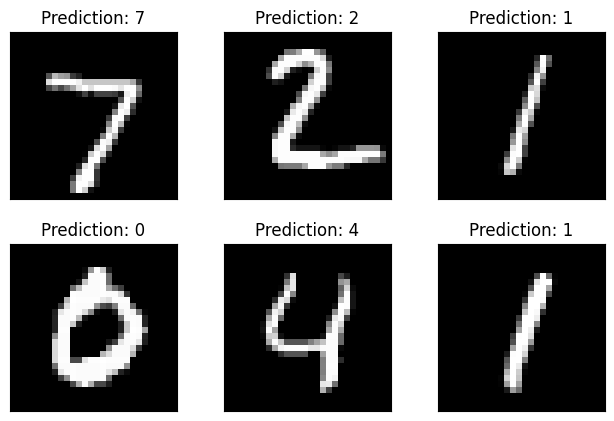

In [7]:
# テストデータのいくつかをプロットして予測結果を確認
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data)

fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f'Prediction: {output.data.max(1, keepdim=True)[1][i].item()}')
    plt.xticks([])
    plt.yticks([])

plt.show()